### Get Stock Price Predictor

[*********************100%***********************]  1 of 1 completed
         Open        High         Low       Close   Adj Close    Volume
0  211.471466  218.053055  209.319321  217.832840  217.832840  26216158
1  222.172165  224.704712  220.095093  222.842850  222.842850  30542227
2  223.223221  226.001007  220.970978  225.845840  225.845840  21594983
3  228.663666  235.485489  226.846848  233.063065  233.063065  35478286
4  233.438431  236.936935  230.700699  233.683685  233.683685  25558216


Open   --- mean : 595.1854611670892   	 Std:  404.659344519683   	 Max:  1820.5400390625   	 Min:  131.38638305664062
High   --- mean : 600.8108673338227   	 Std:  408.7066359298637   	 Max:  1843.8299560546875   	 Min:  134.81982421875
Low    --- mean : 589.2461429843523   	 Std:  400.8042003921636   	 Max:  1817.0   	 Min:  123.77377319335938
Close  --- mean : 595.1791107662782   	 Std:  404.9480276583226   	 Max:  1824.969970703125   	 Min:  128.84884643554688
Volume --- mean : 5555460.540

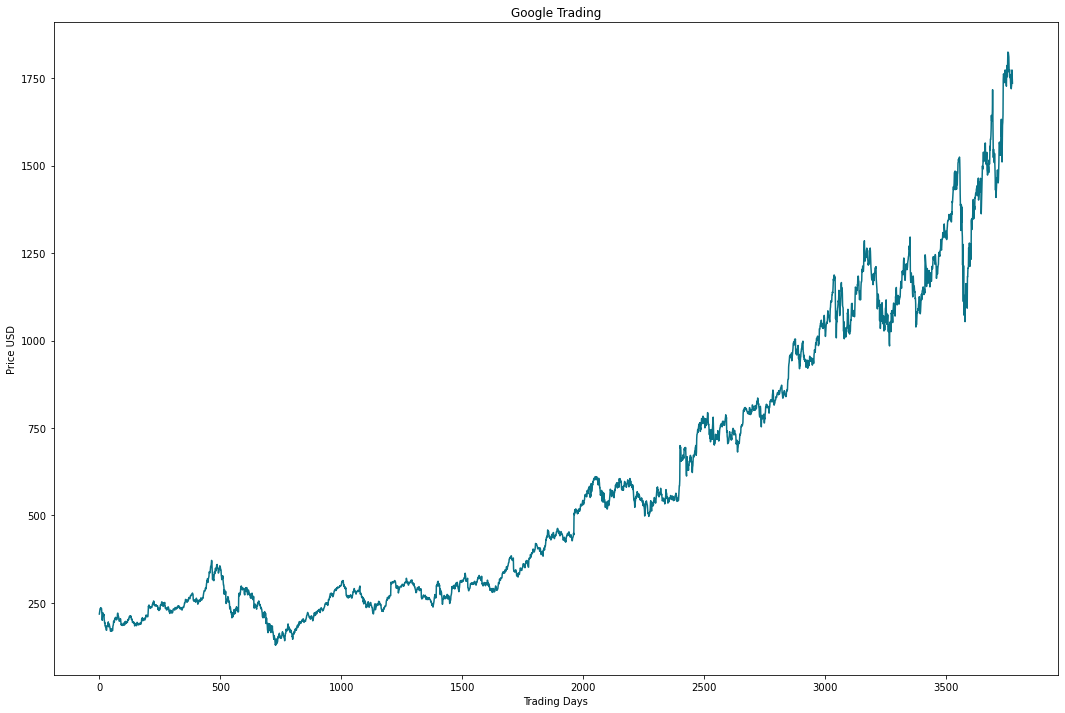

3750


,Open,High,Low,Close,Volume,Item,PCT_CHANGE,SMA,EMA,TR,ATR,BB_RANGE,RSI,ADX
0,171.341339,175.220215,170.940948,174.269272,20794385,52,0.024721,0.006793,0.005651,3.428436,6.990739,18.995925,45.519984,13.487861
1,175.180176,176.006012,169.709717,170.130127,19642538,53,-0.023751,-0.006324,-0.004150,4.279266,6.991489,18.874057,41.940157,13.455205
2,170.045044,172.222229,168.918915,170.280273,15176808,54,0.000883,-0.002354,-0.002472,6.296295,7.095342,17.545950,42.117982,13.537776
3,171.346344,173.048050,170.270264,171.116119,14854531,55,0.004909,0.001954,-0.000012,3.303314,7.133131,15.580164,43.161630,13.450484
4,184.494492,185.230225,181.436432,183.083084,30330839,56,0.069935,0.015339,0.023304,2.777786,6.875374,12.881033,55.525719,13.546528


x_train (2551, 1)
y_train (2551, 1)
x_test (1172, 1)
y_test (1172, 1)


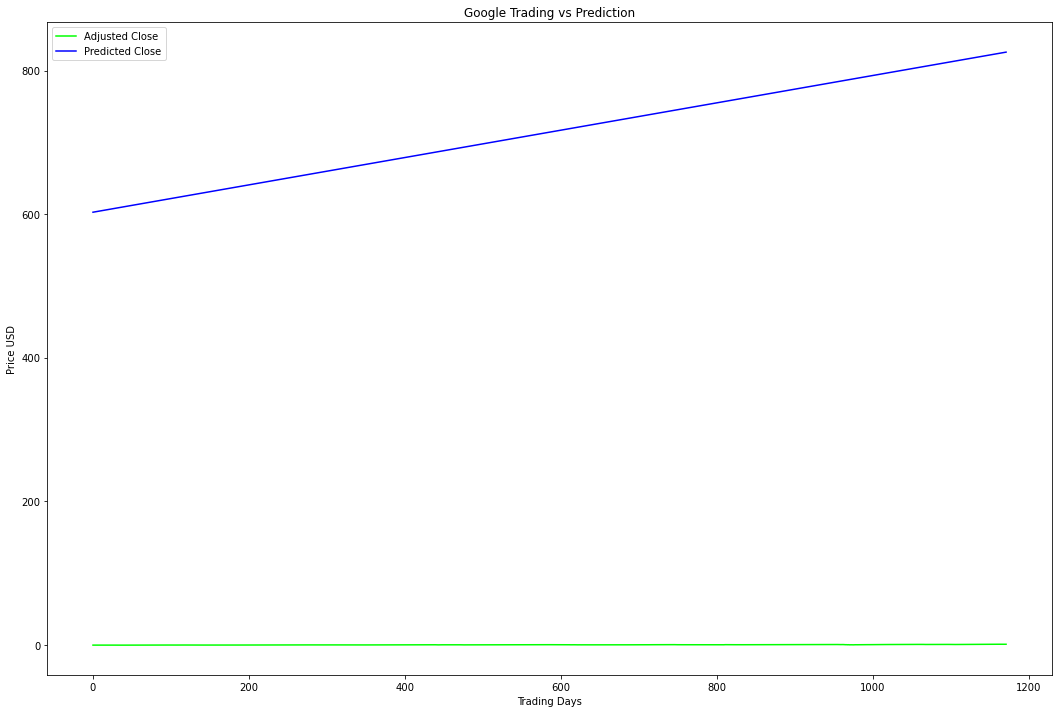

Train Score: 0.2324 MSE (0.4821 RMSE)
Test Score: 513982.72601736 MSE (716.92588600 RMSE)


,Open,High,Low,Close,Volume,PCT_CHANGE,SMA,EMA,TR,ATR,BB_RANGE,RSI,ADX
0,171.341339,175.220215,170.940948,174.269272,20794385,0.024721,0.006793,0.005651,3.428436,6.990739,18.995925,45.519984,13.487861
1,175.180176,176.006012,169.709717,170.130127,19642538,-0.023751,-0.006324,-0.004150,4.279266,6.991489,18.874057,41.940157,13.455205
2,170.045044,172.222229,168.918915,170.280273,15176808,0.000883,-0.002354,-0.002472,6.296295,7.095342,17.545950,42.117982,13.537776
3,171.346344,173.048050,170.270264,171.116119,14854531,0.004909,0.001954,-0.000012,3.303314,7.133131,15.580164,43.161630,13.450484
4,184.494492,185.230225,181.436432,183.083084,30330839,0.069935,0.015339,0.023304,2.777786,6.875374,12.881033,55.525719,13.546528


x_train (3221, 13)
y_train (3221,)
x_test (500, 13)
y_test (500,)
x_train (3171, 50, 13)
y_train (3171,)
x_test (450, 50, 13)
y_test (450,)
y_test_close_base (450,)
y_test_close_actual (450,)
compilation time :  0.006590843200683594
95/95 [==============================] - 25s 74ms/step - loss: 0.0153 - val_loss: 0.0052


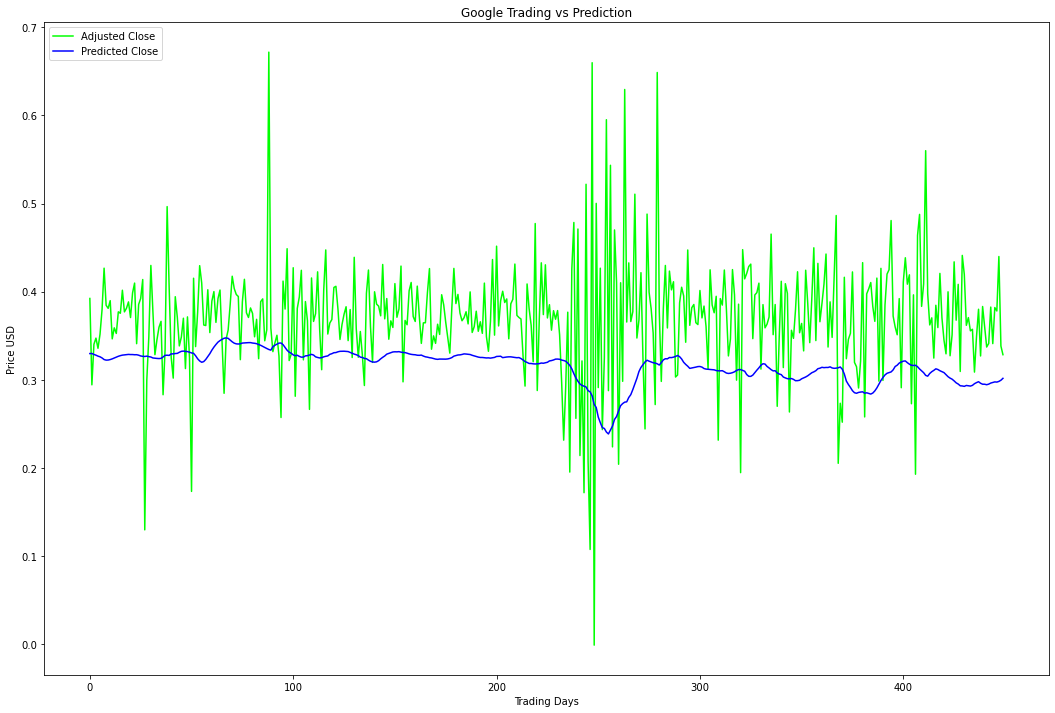

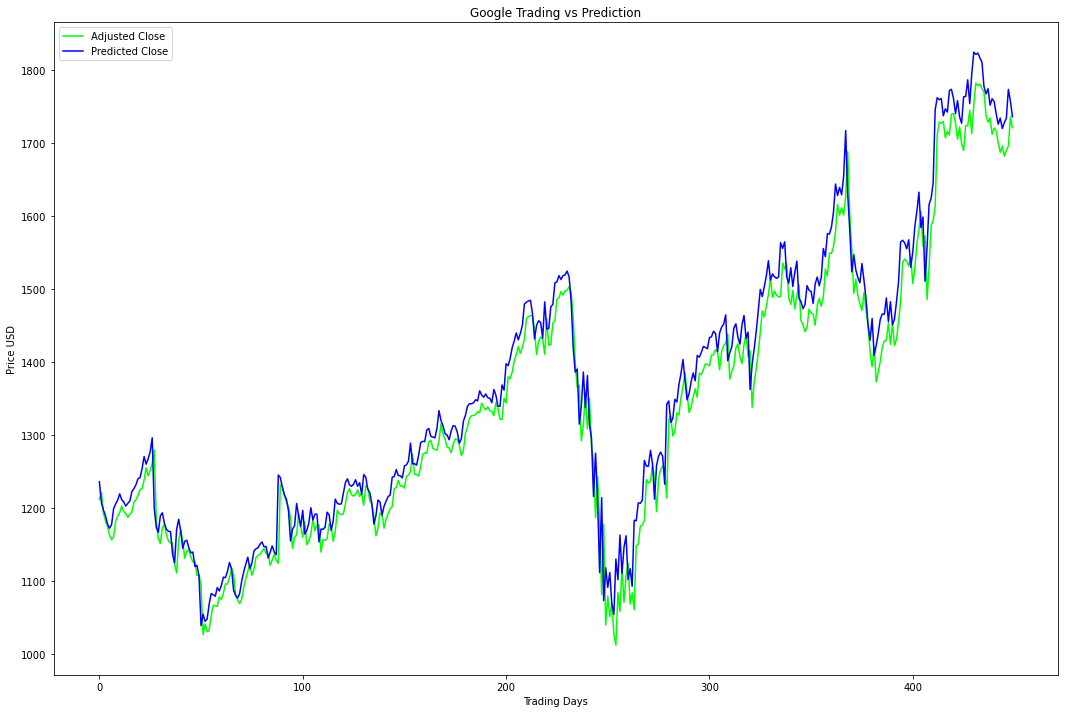

450
[1211.9146218  1221.52224117 1192.98148005 1182.51803898 1174.66365564
 1162.70569624 1156.55389392 1160.44203626 1181.97315044 1188.47421808
 1193.87849406 1202.70197354 1195.17685754 1192.45073483 1187.28119913
 1191.2734132  1194.5946175  1207.68746877 1211.57740465 1216.95731929
 1225.02324474 1226.33521327 1238.39045658 1255.03303137 1244.40466011
 1251.24532562 1261.04572013 1279.50231086 1183.66811208 1158.13880694
 1151.2629044  1173.59587596 1177.35112649 1162.85300561 1154.82637665
 1152.13007358 1152.39219788 1122.41546163 1110.87742561 1156.17231983
 1170.34887731 1154.81566682 1131.13033632 1140.85464892 1142.70471962
 1132.69960864 1126.14407337 1126.94925719 1107.48391573 1108.69241753
 1093.6506646  1026.53437978 1041.18688122 1030.33447742 1032.58976178
 1052.38986418 1066.83331008 1065.97416778 1065.1876957  1078.05741592
 1074.77545824 1083.47305834 1095.74777621 1095.96285689 1105.19990408
 1117.78751244 1109.61352056 1080.79966915 1073.42658024 1069.10395942
 1

Epoch 30/100
27/27 - 2s - loss: 0.0040 - val_loss: 0.0024
Epoch 31/100
27/27 - 2s - loss: 0.0038 - val_loss: 0.0022
Epoch 32/100
27/27 - 2s - loss: 0.0038 - val_loss: 0.0025
Epoch 33/100
27/27 - 3s - loss: 0.0038 - val_loss: 0.0023
Epoch 34/100
27/27 - 3s - loss: 0.0038 - val_loss: 0.0025
Epoch 35/100
27/27 - 3s - loss: 0.0037 - val_loss: 0.0022
Epoch 36/100
27/27 - 2s - loss: 0.0037 - val_loss: 0.0022
Epoch 37/100
27/27 - 2s - loss: 0.0037 - val_loss: 0.0022
Epoch 38/100
27/27 - 3s - loss: 0.0037 - val_loss: 0.0022
Epoch 39/100
27/27 - 3s - loss: 0.0037 - val_loss: 0.0024
Epoch 40/100


KeyboardInterrupt: 

In [1]:
from ipynb.fs.full.Stock_Price_Predictor import *

### Imports

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from IPython.display import display

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import lstm, time #helper libraries

import visualize as vs
import stock_data as sd
import LinearRegressionModel

In [160]:
data = pd.read_csv('google_test.csv') # can replace with any file of the right format.
# stocks = pd.read_csv('google_preprocessed.csv')
# stocks_data = stocks.drop(['Item'], axis =1)

In [161]:
data.head()

,Unnamed: 0,Open,High,Low,Close,Volume,PCT_CHANGE,SMA,EMA,TR,ATR,BB_RANGE,RSI,ADX,Predicted_close
0,3273,1220.000000,1236.439941,1216.579956,1236.130005,1407500,0.007909,0.007241,0.008944,30.400024,18.760492,68.625661,75.608082,23.825579,1229.880125
1,3274,1228.849976,1233.630005,1206.000000,1207.650024,1721100,-0.023040,0.003007,-0.001717,19.859985,18.694989,67.491930,62.823180,24.318978,1239.623867
2,3275,1199.560059,1209.439941,1190.000000,1197.380005,1378800,-0.008504,0.001601,-0.003979,27.630005,19.238989,63.844986,58.951995,23.832932,1211.006668
3,3276,1205.189941,1207.650024,1181.760010,1189.839966,1537600,-0.006297,-0.002000,-0.004752,19.439941,19.646484,58.199201,56.213261,22.935880,1200.895805
4,3277,1191.920044,1191.920044,1164.229980,1178.010010,1471400,-0.009942,-0.007975,-0.006482,25.890015,19.953986,51.505089,52.121918,21.354386,1193.561989


In [162]:
# predictions = model.predict(X_test)
# print(predictions.shape)

In [163]:
#change array into dataframe for strategy
# df = pd.DataFrame(predictions, columns = ['predicted_price_normalized'])
# df.head()

In [164]:
# data = pd.read_csv('google.csv')
# min_p = np.min(data['Close'])
# max_p = np.max(data['Close'])
# print(max_p)
# print(min_p)
# denormalized_p = df['predicted_price_normalized'] * (max_p - min_p) + min_p
# denormalized_p #denormalized predicted_price

In [165]:
# denorm_pred_prices = denormalized_p.to_frame()
# denorm_pred_prices.tail()

## Strategy: Leverage to amplify returns, stop levels to limit losses.
## Want to study how different 1) stop levels, 2) leverage levels affect ROI.


In [166]:
# for higher leverages,'higher' the stop loss level. If 1% leverage, 5% stop loss,
# then if we double leverage: 2% leverage, 2.5% stop loss. To limit downside.

In [167]:
# join the dataframes
data.head()
combined = data #we only have 450 rows of predictions,
#so drop the NaN values for the days we did not predict.

In [168]:
combined['Day Range'] = combined['High'] - combined['Low']
combined['Confidence %'] = (combined['Predicted_close'] - combined['Open'])/combined['Open']*100
print(combined['Confidence %'].mean())
combined.head(20)

0.3046161305270776


,Unnamed: 0,Open,High,Low,Close,Volume,PCT_CHANGE,SMA,EMA,TR,ATR,BB_RANGE,RSI,ADX,Predicted_close,Day Range,Confidence %
0,3273,1220.000000,1236.439941,1216.579956,1236.130005,1407500,0.007909,0.007241,0.008944,30.400024,18.760492,68.625661,75.608082,23.825579,1229.880125,19.859985,0.809846
1,3274,1228.849976,1233.630005,1206.000000,1207.650024,1721100,-0.023040,0.003007,-0.001717,19.859985,18.694989,67.491930,62.823180,24.318978,1239.623867,27.630005,0.876746
2,3275,1199.560059,1209.439941,1190.000000,1197.380005,1378800,-0.008504,0.001601,-0.003979,27.630005,19.238989,63.844986,58.951995,23.832932,1211.006668,19.439941,0.954234
3,3276,1205.189941,1207.650024,1181.760010,1189.839966,1537600,-0.006297,-0.002000,-0.004752,19.439941,19.646484,58.199201,56.213261,22.935880,1200.895805,25.890015,-0.356304
4,3277,1191.920044,1191.920044,1164.229980,1178.010010,1471400,-0.009942,-0.007975,-0.006482,25.890015,19.953986,51.505089,52.121918,21.354386,1193.561989,27.690063,0.137756
5,3278,1175.500000,1177.250000,1163.430054,1172.270020,1120100,-0.004873,-0.010531,-0.005946,27.690063,20.479993,44.608523,50.212285,19.923424,1181.877866,13.819946,0.542566
6,3279,1180.180054,1183.969971,1166.380005,1176.890015,1544500,0.003941,-0.005135,-0.002650,13.819946,20.391992,36.913864,51.744745,18.737218,1176.249971,17.589966,-0.333007
7,3280,1187.540039,1200.199951,1186.359985,1198.979980,1385300,0.018770,0.000320,0.004490,17.589966,20.321490,28.482664,58.346464,18.370411,1180.889439,13.839966,-0.560032
8,3281,1200.050049,1205.810059,1191.239990,1205.540039,914400,0.005471,0.002673,0.004817,13.839966,19.649988,18.355400,60.092542,18.264884,1202.832218,14.570068,0.231838
9,3282,1212.699951,1220.599976,1205.079956,1210.810059,1109000,0.004372,0.005536,0.004669,14.570068,19.204993,10.256718,61.489180,18.746230,1208.926602,15.520020,-0.311153


In [169]:
def compute_leverage_stop_toAssign(conf_lvl, baseLeverage = 5, stop = 5, take_prof = 7):
    if (conf_lvl < 0): #negative confidence, no trade
        return 0, 0, 0 #leverage: 0, stop: 0
    elif (conf_lvl > 0 and conf_lvl < 0.5): # OK confidence
        return baseLeverage, stop, take_prof
    elif (conf_lvl >= 0.5 and conf_lvl <= 1.5): # GOOD confidence
        pct_lev = conf_lvl/(abs(100 - conf_lvl)/100)*10 # % of leverage to take
        pct_stop = stop * baseLeverage/pct_lev
        return pct_lev, pct_stop, take_prof
    elif (conf_lvl <= 10): # VERY GOOD confidence, not expecting confidence above 10%
        pct_lev = conf_lvl/(abs(100 - conf_lvl)/100)*100 # % of leverage to take
        pct_stop = stop * baseLeverage/pct_lev
        return pct_lev, pct_stop, take_prof
    else:
        return -1, -1, -1

In [170]:
compute_leverage_stop_toAssign(2, 5)

(204.08163265306123, 0.1225, 7)

## We want to make trades with  good RR ratio

In [171]:
#leverage is based on capital
combined.head()

,Unnamed: 0,Open,High,Low,Close,Volume,PCT_CHANGE,SMA,EMA,TR,ATR,BB_RANGE,RSI,ADX,Predicted_close,Day Range,Confidence %
0,3273,1220.000000,1236.439941,1216.579956,1236.130005,1407500,0.007909,0.007241,0.008944,30.400024,18.760492,68.625661,75.608082,23.825579,1229.880125,19.859985,0.809846
1,3274,1228.849976,1233.630005,1206.000000,1207.650024,1721100,-0.023040,0.003007,-0.001717,19.859985,18.694989,67.491930,62.823180,24.318978,1239.623867,27.630005,0.876746
2,3275,1199.560059,1209.439941,1190.000000,1197.380005,1378800,-0.008504,0.001601,-0.003979,27.630005,19.238989,63.844986,58.951995,23.832932,1211.006668,19.439941,0.954234
3,3276,1205.189941,1207.650024,1181.760010,1189.839966,1537600,-0.006297,-0.002000,-0.004752,19.439941,19.646484,58.199201,56.213261,22.935880,1200.895805,25.890015,-0.356304
4,3277,1191.920044,1191.920044,1164.229980,1178.010010,1471400,-0.009942,-0.007975,-0.006482,25.890015,19.953986,51.505089,52.121918,21.354386,1193.561989,27.690063,0.137756


In [172]:
combined['x'] = combined['Confidence %'].apply(compute_leverage_stop_toAssign)
combined[['Leverage Pct', 'Stop Loss', 'Take Profit']] = combined['x'].apply(pd.Series)
combined.tail()
combined.head(15)

,Unnamed: 0,Open,High,Low,Close,Volume,PCT_CHANGE,SMA,EMA,TR,...,BB_RANGE,RSI,ADX,Predicted_close,Day Range,Confidence %,x,Leverage Pct,Stop Loss,Take Profit
0,3273,1220.000000,1236.439941,1216.579956,1236.130005,1407500,0.007909,0.007241,0.008944,30.400024,...,68.625661,75.608082,23.825579,1229.880125,19.859985,0.809846,"(8.164583773257359, 3.062005448690001, 7)",8.164584,3.062005,7.0
1,3274,1228.849976,1233.630005,1206.000000,1207.650024,1721100,-0.023040,0.003007,-0.001717,19.859985,...,67.491930,62.823180,24.318978,1239.623867,27.630005,0.876746,"(8.845007204240273, 2.826453322504369, 7)",8.845007,2.826453,7.0
2,3275,1199.560059,1209.439941,1190.000000,1197.380005,1378800,-0.008504,0.001601,-0.003979,27.630005,...,63.844986,58.951995,23.832932,1211.006668,19.439941,0.954234,"(9.634273142914708, 2.594902555610606, 7)",9.634273,2.594903,7.0
3,3276,1205.189941,1207.650024,1181.760010,1189.839966,1537600,-0.006297,-0.002000,-0.004752,19.439941,...,58.199201,56.213261,22.935880,1200.895805,25.890015,-0.356304,"(0, 0, 0)",0.000000,0.000000,0.0
4,3277,1191.920044,1191.920044,1164.229980,1178.010010,1471400,-0.009942,-0.007975,-0.006482,25.890015,...,51.505089,52.121918,21.354386,1193.561989,27.690063,0.137756,"(5, 5, 7)",5.000000,5.000000,7.0
5,3278,1175.500000,1177.250000,1163.430054,1172.270020,1120100,-0.004873,-0.010531,-0.005946,27.690063,...,44.608523,50.212285,19.923424,1181.877866,13.819946,0.542566,"(5.455260668104698, 4.582732434064542, 7)",5.455261,4.582732,7.0
6,3279,1180.180054,1183.969971,1166.380005,1176.890015,1544500,0.003941,-0.005135,-0.002650,13.819946,...,36.913864,51.744745,18.737218,1176.249971,17.589966,-0.333007,"(0, 0, 0)",0.000000,0.000000,0.0
7,3280,1187.540039,1200.199951,1186.359985,1198.979980,1385300,0.018770,0.000320,0.004490,17.589966,...,28.482664,58.346464,18.370411,1180.889439,13.839966,-0.560032,"(0, 0, 0)",0.000000,0.000000,0.0
8,3281,1200.050049,1205.810059,1191.239990,1205.540039,914400,0.005471,0.002673,0.004817,13.839966,...,18.355400,60.092542,18.264884,1202.832218,14.570068,0.231838,"(5, 5, 7)",5.000000,5.000000,7.0
9,3282,1212.699951,1220.599976,1205.079956,1210.810059,1109000,0.004372,0.005536,0.004669,14.570068,...,10.256718,61.489180,18.746230,1208.926602,15.520020,-0.311153,"(0, 0, 0)",0.000000,0.000000,0.0


## Trade scope: Weekly (buy/sell within each week)

In [173]:
# combined['T+' + str(1)] = combined['Confidence %'].shift(1)
# combined['T+' + str(2)] = combined['Confidence %'].shift(2)
# combined['T+' + str(3)] = combined['Confidence %'].shift(3)
# combined['T+' + str(4)] = combined['Confidence %'].shift(4)
# combined['T+' + str(5)] = combined['Confidence %'].shift(5)
# combined['T+' + str(6)] = combined['Confidence %'].shift(6)
# combined['T+' + str(7)] = combined['Confidence %'].shift(7)
combined.head(100)

,Unnamed: 0,Open,High,Low,Close,Volume,PCT_CHANGE,SMA,EMA,TR,...,BB_RANGE,RSI,ADX,Predicted_close,Day Range,Confidence %,x,Leverage Pct,Stop Loss,Take Profit
0,3273,1220.000000,1236.439941,1216.579956,1236.130005,1407500,0.007909,0.007241,0.008944,30.400024,...,68.625661,75.608082,23.825579,1229.880125,19.859985,0.809846,"(8.164583773257359, 3.062005448690001, 7)",8.164584,3.062005,7.0
1,3274,1228.849976,1233.630005,1206.000000,1207.650024,1721100,-0.023040,0.003007,-0.001717,19.859985,...,67.491930,62.823180,24.318978,1239.623867,27.630005,0.876746,"(8.845007204240273, 2.826453322504369, 7)",8.845007,2.826453,7.0
2,3275,1199.560059,1209.439941,1190.000000,1197.380005,1378800,-0.008504,0.001601,-0.003979,27.630005,...,63.844986,58.951995,23.832932,1211.006668,19.439941,0.954234,"(9.634273142914708, 2.594902555610606, 7)",9.634273,2.594903,7.0
3,3276,1205.189941,1207.650024,1181.760010,1189.839966,1537600,-0.006297,-0.002000,-0.004752,19.439941,...,58.199201,56.213261,22.935880,1200.895805,25.890015,-0.356304,"(0, 0, 0)",0.000000,0.000000,0.0
4,3277,1191.920044,1191.920044,1164.229980,1178.010010,1471400,-0.009942,-0.007975,-0.006482,25.890015,...,51.505089,52.121918,21.354386,1193.561989,27.690063,0.137756,"(5, 5, 7)",5.000000,5.000000,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3368,1165.520020,1181.400024,1161.530029,1171.079956,1800700,0.014142,-0.009323,-0.004704,34.130005,...,77.406571,52.040871,24.461588,1157.121416,19.869995,-0.720589,"(0, 0, 0)",0.000000,0.000000,0.0
96,3369,1157.800049,1179.869995,1150.839966,1175.910034,1534300,0.004124,-0.006902,-0.001761,19.869995,...,73.935557,53.125576,22.738596,1174.137834,29.030029,1.411106,"(14.313030928703988, 1.7466600976781157, 7)",14.313031,1.746660,7.0
97,3370,1186.430054,1206.280029,1174.000000,1206.189941,1505800,0.025750,-0.000698,0.007409,29.030029,...,65.534268,59.334935,21.940920,1179.372045,32.280029,-0.594895,"(0, 0, 0)",0.000000,0.000000,0.0
98,3371,1199.989990,1204.459961,1184.890015,1188.900024,1020900,-0.014334,-0.001013,0.000161,32.280029,...,53.956884,54.865685,21.200221,1210.027240,19.569946,0.836444,"(8.434998380872134, 2.963841707034819, 7)",8.434998,2.963842,7.0


In [174]:
# combined.drop('T+1', 1, inplace = True)
# combined.drop('T+2', 1, inplace = True)
# combined.drop('T+3', 1, inplace = True)
# combined.drop('T+4', 1, inplace = True)
# combined.drop('T+5', 1, inplace = True)
# combined.drop('T+6', 1, inplace = True)
# combined.drop('T+7', 1, inplace = True)

In [175]:
# Want to shift 'x', want to maintain an entry price. 
# Compute 'leveraged position', 'stop loss price', and 'take profit price' upon trade

In [176]:
def enterTrade(price, leverage_pct, stop_loss, take_profit):
    entry_price = price
    if (capital <= 0):
        print("No more capital. End.")
    leveraged_position = (1 + (leverage_pct/100)) * capital
    trade_size = leveraged_position/price
    stop_loss_price = (1 - (stop_loss/100)) * entry_price
    take_profit_price = (1 + (take_profit/100))* entry_price
    print(entry_price)
    print(stop_loss_price)
    print(take_profit_price)
    print(leverage_pct)
    print("entered trade")
    return True, entry_price, trade_size, leveraged_position, stop_loss_price, take_profit_price
    
def exitTrade(entryPrice, exitPrice, trade_size, capital):
    #compute gains/losses and start fresh
    print('exiting trade')
    returns = (exitPrice - entryPrice) * trade_size
    print('Entry Price: ' + str(entryPrice))
    print('Exit Price: ' + str(exitPrice))
    print('Leveraged_Position: ' + str(leveraged_position))
    print("Gained/Lost: " + str(returns))
    capital += returns
#     in_trade = False
#     entry_price = 0
#     leveraged_position = 0
#     stop_loss_price = 0
#     take_profit_price = 0
    return False, 0, 0, 0, 0, 0, capital

## Configure 'Take Profit' to study different profit taking levels that yield the highest return.

In [177]:
days = []
cur_capital = []
capital = 1000
in_trade = False
entry_price = 0
trade_size = 0
leveraged_position = 0 #amount in $ involved in trade
stop_loss_price = 0
take_profit_price = 0

In [178]:
combined['Take Profit'] = 10
for i, row in combined.iterrows():
    days.append(i)
    cur_capital.append(capital)
    if (in_trade == False): # check for opportunity to make a trade
        if (row['Confidence %'] > 0 and row['Confidence %'] < 5):
            in_trade, entry_price, trade_size, leveraged_position, stop_loss_price, take_profit_price = enterTrade(row['Open'], row['Leverage Pct'], row['Stop Loss'], row['Take Profit'])
            print("take profit at: " + str(take_profit_price))
            print("stop loss at: " + str(stop_loss_price))
        else:
            print('no trade, confidence too extreme or low')
    else:
        print('In a trade, looking to sell')
        if (take_profit_price > row['High']):
            # our target not met, check for need to cut loss.
            if (stop_loss_price > row['Low']):
                # exit trade, limit loss.
                in_trade, entry_price, trade_size, leveraged_position, stop_loss_price, take_profit_price, capital = exitTrade(entry_price, stop_loss_price, trade_size, capital)
                print("Bad trade, capital left: " + str(capital))
            else:
                print('no trade')
                # no trade for the day
        else:
            # target met, sell it.
            in_trade, entry_price, trade_size, leveraged_position, stop_loss_price, take_profit_price, capital = exitTrade(entry_price, take_profit_price, trade_size, capital)
            print("Good trade, capital left: " + str(capital))
            

1220.0
1182.643533525982
1342.0
8.164583773257359
entered trade
take profit at: 1342.0
stop loss at: 1182.643533525982
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
exiting trade
Entry Price: 1220.0
Exit Price: 1182.643533525982
Leveraged_Position: 1081.6458377325735
Gained/Lost: -33.12005448689991
Bad trade, capital left: 966.8799455131001
1191.9200439453125
1132.3240417480467
1311.1120483398438
5.0
entered trade
take profit at: 1311.1120483398438
stop loss at: 1132.3240417480467
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, lo

In [179]:
print(capital)
print(len(days))
print(len(cur_capital))
d10 = np.asarray(days)
c10 = np.asarray(cur_capital)

3254.8570623340224
450
450


In [180]:
days = []
cur_capital = []
capital = 1000
in_trade = False
entry_price = 0
trade_size = 0
leveraged_position = 0 #amount in $ involved in trade
stop_loss_price = 0
take_profit_price = 0

combined['Take Profit'] = 20
for i, row in combined.iterrows():
    days.append(i)
    cur_capital.append(capital)
    if (in_trade == False): # check for opportunity to make a trade
        if (row['Confidence %'] > 0 and row['Confidence %'] < 5):
            in_trade, entry_price, trade_size, leveraged_position, stop_loss_price, take_profit_price = enterTrade(row['Open'], row['Leverage Pct'], row['Stop Loss'], row['Take Profit'])
            print("take profit at: " + str(take_profit_price))
            print("stop loss at: " + str(stop_loss_price))
        else:
            print('no trade, confidence too extreme or low')
    else:
        print('In a trade, looking to sell')
        if (take_profit_price > row['High']):
            # our target not met, check for need to cut loss.
            if (stop_loss_price > row['Low']):
                # exit trade, limit loss.
                in_trade, entry_price, trade_size, leveraged_position, stop_loss_price, take_profit_price, capital = exitTrade(entry_price, stop_loss_price, trade_size, capital)
                print("Bad trade, capital left: " + str(capital))
            else:
                print('no trade')
                # no trade for the day
        else:
            # target met, sell it.
            in_trade, entry_price, trade_size, leveraged_position, stop_loss_price, take_profit_price, capital = exitTrade(entry_price, take_profit_price, trade_size, capital)
            print("Good trade, capital left: " + str(capital))

1220.0
1182.643533525982
1464.0
8.164583773257359
entered trade
take profit at: 1464.0
stop loss at: 1182.643533525982
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
exiting trade
Entry Price: 1220.0
Exit Price: 1182.643533525982
Leveraged_Position: 1081.6458377325735
Gained/Lost: -33.12005448689991
Bad trade, capital left: 966.8799455131001
1191.9200439453125
1132.3240417480467
1430.3040527343749
5.0
entered trade
take profit at: 1430.3040527343749
stop loss at: 1132.3240417480467
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, lo

In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
exiting trade
Entry Price: 1425.050048828125
Exit Price: 1710.06005859375
Leveraged_Position: 1807.1588259499392
Gained/Lost: 361.43176518998786
Good trade, capital left: 2077.6869351595737
no trade, confidence too extreme or low
1751.3399658203125
1706.0427601249853
2101.607958984375
9.665827830528695
entered trade
take profit at: 2101.607958984375
stop loss at: 1706.0427601249853
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no t

In [181]:
print(capital)
print(len(days))
print(len(cur_capital))
d20 = np.asarray(days)
c20 = np.asarray(cur_capital)

2018.7547718436447
450
450


In [182]:
days = []
cur_capital = []
capital = 1000
in_trade = False
entry_price = 0
trade_size = 0
leveraged_position = 0 #amount in $ involved in trade
stop_loss_price = 0
take_profit_price = 0

combined['Take Profit'] = 5
for i, row in combined.iterrows():
    days.append(i)
    cur_capital.append(capital)
    if (in_trade == False): # check for opportunity to make a trade
        if (row['Confidence %'] > 0 and row['Confidence %'] < 5):
            in_trade, entry_price, trade_size, leveraged_position, stop_loss_price, take_profit_price = enterTrade(row['Open'], row['Leverage Pct'], row['Stop Loss'], row['Take Profit'])
            print("take profit at: " + str(take_profit_price))
            print("stop loss at: " + str(stop_loss_price))
        else:
            print('no trade, confidence too extreme or low')
    else:
        print('In a trade, looking to sell')
        if (take_profit_price > row['High']):
            # our target not met, check for need to cut loss.
            if (stop_loss_price > row['Low']):
                # exit trade, limit loss.
                in_trade, entry_price, trade_size, leveraged_position, stop_loss_price, take_profit_price, capital = exitTrade(entry_price, stop_loss_price, trade_size, capital)
                print("Bad trade, capital left: " + str(capital))
            else:
                print('no trade')
                # no trade for the day
        else:
            # target met, sell it.
            in_trade, entry_price, trade_size, leveraged_position, stop_loss_price, take_profit_price, capital = exitTrade(entry_price, take_profit_price, trade_size, capital)
            print("Good trade, capital left: " + str(capital))

1220.0
1182.643533525982
1281.0
8.164583773257359
entered trade
take profit at: 1281.0
stop loss at: 1182.643533525982
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
exiting trade
Entry Price: 1220.0
Exit Price: 1182.643533525982
Leveraged_Position: 1081.6458377325735
Gained/Lost: -33.12005448689991
Bad trade, capital left: 966.8799455131001
1191.9200439453125
1132.3240417480467
1251.5160461425783
5.0
entered trade
take profit at: 1251.5160461425783
stop loss at: 1132.3240417480467
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, lo

stop loss at: 1308.4047762655252
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
exiting trade
Entry Price: 1333.52001953125
Exit Price: 1400.1960205078126
Leveraged_Position: 1420.9036629100415
Gained/Lost: 71.04518314550216
Good trade, capital left: 1325.44030485738
1410.989990234375
1340.4404907226562
1481.5394897460938
5.0
entered trade
take profit at: 1481.5394897460938
stop loss at: 1340.4404907226562
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looki

In [183]:
print(capital)
print(len(days))
print(len(cur_capital))
d5 = np.asarray(days)
c5 = np.asarray(cur_capital)

1666.9837530646016
450
450


In [184]:
days = []
cur_capital = []
capital = 1000
in_trade = False
entry_price = 0
trade_size = 0
leveraged_position = 0 #amount in $ involved in trade
stop_loss_price = 0
take_profit_price = 0

combined['Take Profit'] = 8
for i, row in combined.iterrows():
    days.append(i)
    cur_capital.append(capital)
    if (in_trade == False): # check for opportunity to make a trade
        if (row['Confidence %'] > 0 and row['Confidence %'] < 5):
            in_trade, entry_price, trade_size, leveraged_position, stop_loss_price, take_profit_price = enterTrade(row['Open'], row['Leverage Pct'], row['Stop Loss'], row['Take Profit'])
            print("take profit at: " + str(take_profit_price))
            print("stop loss at: " + str(stop_loss_price))
        else:
            print('no trade, confidence too extreme or low')
    else:
        print('In a trade, looking to sell')
        if (take_profit_price > row['High']):
            # our target not met, check for need to cut loss.
            if (stop_loss_price > row['Low']):
                # exit trade, limit loss.
                in_trade, entry_price, trade_size, leveraged_position, stop_loss_price, take_profit_price, capital = exitTrade(entry_price, stop_loss_price, trade_size, capital)
                print("Bad trade, capital left: " + str(capital))
            else:
                print('no trade')
                # no trade for the day
        else:
            # target met, sell it.
            in_trade, entry_price, trade_size, leveraged_position, stop_loss_price, take_profit_price, capital = exitTrade(entry_price, take_profit_price, trade_size, capital)
            print("Good trade, capital left: " + str(capital))

1220.0
1182.643533525982
1317.6000000000001
8.164583773257359
entered trade
take profit at: 1317.6000000000001
stop loss at: 1182.643533525982
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
exiting trade
Entry Price: 1220.0
Exit Price: 1182.643533525982
Leveraged_Position: 1081.6458377325735
Gained/Lost: -33.12005448689991
Bad trade, capital left: 966.8799455131001
1191.9200439453125
1132.3240417480467
1287.2736474609376
5.0
entered trade
take profit at: 1287.2736474609376
stop loss at: 1132.3240417480467
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell

no trade
In a trade, looking to sell
exiting trade
Entry Price: 1516.9100341796875
Exit Price: 1638.2628369140625
Leveraged_Position: 2014.0315994456037
Gained/Lost: 161.1225279556483
Good trade, capital left: 2079.247860760985
1646.6099853515625
1564.2794860839842
1778.3387841796875
5.0
entered trade
take profit at: 1778.3387841796875
stop loss at: 1564.2794860839842
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
exiting trade
Entry Price: 1646.6099853515625
Exit Price: 1564.2794860839842
Leveraged_Position: 2183.2102537990345
Gained/Lost: -109.1605126899519
Bad trade, capital left: 1970.0873480710331
1525.0
1524.1235454197722
1647.0
434.99116622898964
entered trade
take profit at: 1647.0
stop loss at: 1524.1235454197722
In a trade, looking to sell
no trade
In a trade, looking to sell
exiting trade
Entry Price: 1525.0
Exi

In [185]:
print(capital)
print(len(days))
print(len(cur_capital))
d8 = np.asarray(days)
c8 = np.asarray(cur_capital)

2188.5569978871213
450
450


In [186]:
days = []
cur_capital = []
capital = 1000
in_trade = False
entry_price = 0
trade_size = 0
leveraged_position = 0 #amount in $ involved in trade
stop_loss_price = 0
take_profit_price = 0

combined['Take Profit'] = 12
for i, row in combined.iterrows():
    days.append(i)
    cur_capital.append(capital)
    if (in_trade == False): # check for opportunity to make a trade
        if (row['Confidence %'] > 0 and row['Confidence %'] < 5):
            in_trade, entry_price, trade_size, leveraged_position, stop_loss_price, take_profit_price = enterTrade(row['Open'], row['Leverage Pct'], row['Stop Loss'], row['Take Profit'])
            print("take profit at: " + str(take_profit_price))
            print("stop loss at: " + str(stop_loss_price))
        else:
            print('no trade, confidence too extreme or low')
    else:
        print('In a trade, looking to sell')
        if (take_profit_price > row['High']):
            # our target not met, check for need to cut loss.
            if (stop_loss_price > row['Low']):
                # exit trade, limit loss.
                in_trade, entry_price, trade_size, leveraged_position, stop_loss_price, take_profit_price, capital = exitTrade(entry_price, stop_loss_price, trade_size, capital)
                print("Bad trade, capital left: " + str(capital))
            else:
                print('no trade')
                # no trade for the day
        else:
            # target met, sell it.
            in_trade, entry_price, trade_size, leveraged_position, stop_loss_price, take_profit_price, capital = exitTrade(entry_price, take_profit_price, trade_size, capital)
            print("Good trade, capital left: " + str(capital))

1220.0
1182.643533525982
1366.4
8.164583773257359
entered trade
take profit at: 1366.4
stop loss at: 1182.643533525982
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
exiting trade
Entry Price: 1220.0
Exit Price: 1182.643533525982
Leveraged_Position: 1081.6458377325735
Gained/Lost: -33.12005448689991
Bad trade, capital left: 966.8799455131001
1191.9200439453125
1132.3240417480467
1334.9504492187502
5.0
entered trade
take profit at: 1334.9504492187502
stop loss at: 1132.3240417480467
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, lo

no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
n

In [187]:
print(capital)
print(len(days))
print(len(cur_capital))
d12 = np.asarray(days)
c12 = np.asarray(cur_capital)

2218.0576758225934
450
450


## Plotting the graphs 

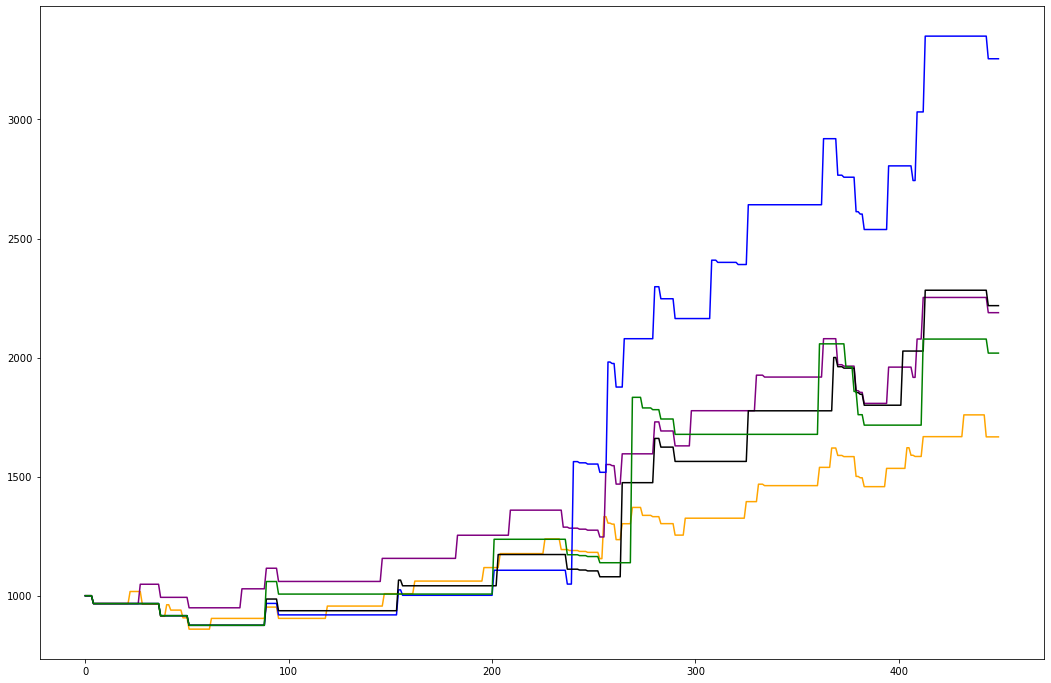

In [188]:
plt.plot(d5, c5, label = '5% take profit', color = 'Orange')
plt.plot(d8, c8, label = '8% take profit', color = 'Purple')
plt.plot(d10, c10, label = '10% take profit', color = 'Blue')
plt.plot(d12, c12, label = '12% take profit', color = 'Black')
plt.plot(d20, c20, label = '20% take profit', color = 'Green')